In [ ]:
!pip install pandas transformers google

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load examples

In [30]:
import pandas as pd

TEST_FILE = "/content/drive/MyDrive/Colab Notebooks/imdb_master.csv"

df = pd.read_csv(TEST_FILE, encoding="ISO-8859-1")
df.drop(['Unnamed: 0', 'type', 'file'], axis=1, inplace=True)
df.drop(df[df.label == 'unsup'].index, inplace=True)
df['label'] = df['label'].map({'neg': 0, 'pos': 1})

sample = df.sample(10000)

X_test = sample['review'].tolist()
y_test = sample['label'].tolist()

df.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


## Evaluate model

In [31]:
import sklearn.metrics as metrics

def evaluate_model(y_test, y_pred):

  print(metrics.classification_report(y_test, y_pred, digits=3))

  cm = metrics.confusion_matrix(y_test, y_pred)
  metrics.ConfusionMatrixDisplay(cm).plot()

  print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.3f}")
  print(f"Precision: {metrics.precision_score(y_test, y_pred):.3f}")
  print(f"Recall: {metrics.recall_score(y_test, y_pred):.3f}")
  print(f"F1: {metrics.f1_score(y_test, y_pred):.3f}")
  print(cm)

## Load models

In [29]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

model_names = ["nlptown/bert-base-multilingual-uncased-sentiment",
          "JamesH/Movie_review_sentiment_analysis_model",
          "LiYuan/amazon-review-sentiment-analysis"]

classifiers = []
for model_name in model_names:
  tokenizer = AutoTokenizer.from_pretrained(model_name)
  model = AutoModelForSequenceClassification.from_pretrained(model_name)
  classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, truncation=True, max_length=512, device=0)
  classifiers.append(classifier)

In [32]:
import sys

y_pred_bert, y_pred_movie, y_pred_amazon = [], [], []

for i, text in enumerate(X_test):
    sys.stdout.write('\r')
    sys.stdout.write(f"Processing {i} of {len(X_test)}")

    y_pred_bert.append(classifiers[0](text)[0]['label'])
    y_pred_movie.append(classifiers[1](text)[0]['label'])
    y_pred_amazon.append(classifiers[2](text)[0]['label'])

    sys.stdout.flush()


Processing 12 of 10000

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Processing 9999 of 10000

['5 stars', '1 star', '5 stars', '3 stars', '3 stars', '2 stars', '2 stars', '4 stars', '1 star', '2 stars', '4 stars', '1 star', '2 stars', '4 stars', '2 stars', '3 stars', '5 stars', '2 stars', '2 stars', '2 stars', '4 stars', '4 stars', '1 star', '4 stars', '4 stars', '2 stars', '4 stars', '2 stars', '5 stars', '4 stars', '1 star', '2 stars', '3 stars', '4 stars', '3 stars', '2 stars', '5 stars', '2 stars', '3 stars', '2 stars', '3 stars', '4 stars', '5 stars', '1 star', '1 star', '1 star', '3 stars', '2 stars', '1 star', '2 stars', '1 star', '4 stars', '4 stars', '5 stars', '5 stars', '4 stars', '3 stars', '4 stars', '2 stars', '1 star', '5 stars', '3 stars', '5 stars', '4 stars', '2 stars', '4 stars', '4 stars', '1 star', '2 stars', '2 stars', '2 stars', '4 stars', '4 stars', '5 stars', '4 stars', '4 stars', '4 stars', '2 stars', '4 stars', '1 star', '3 stars', '4 stars', '3 stars', '1 star', '4 stars', '2 stars', '2 stars', '4 stars', '1 star', '4 stars', '1 star', '1 star', '3 s

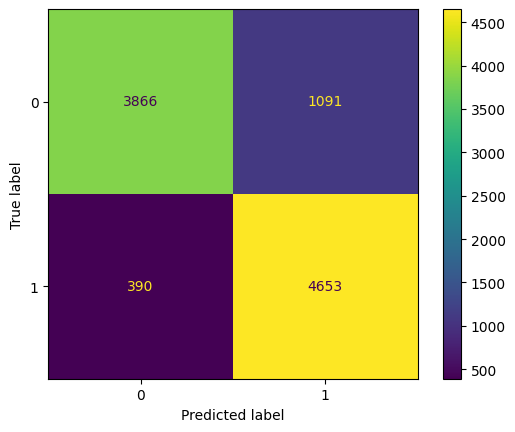

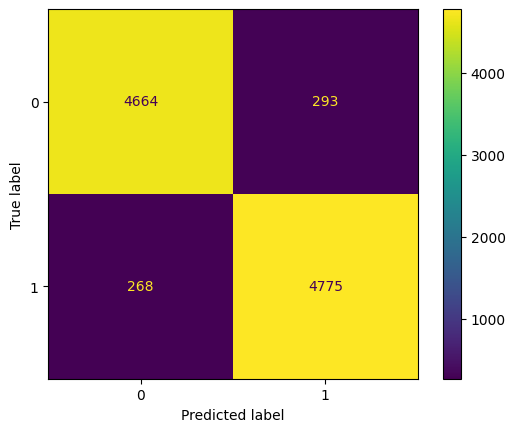

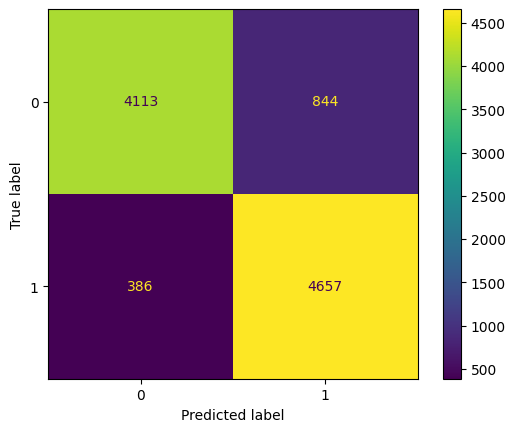

In [33]:
print(y_pred_bert)
print(y_pred_movie)
print(y_pred_amazon)
y_pred_bert_filtered= [0 if int(x.split(" ")[0]) < 3 else 1 for x in y_pred_bert]
y_pred_movie_filtered = [0 if x == "NEG" else 1 for x in y_pred_movie]
y_pred_amazon_filtered = [0 if int(x.split(" ")[0]) <= 3 else 1 for x in y_pred_amazon]
evaluate_model(y_test, y_pred_bert_filtered)
evaluate_model(y_test, y_pred_movie_filtered)
evaluate_model(y_test, y_pred_amazon_filtered)

              precision    recall  f1-score   support

           0      0.869     0.963     0.914      4957
           1      0.960     0.857     0.906      5043

    accuracy                          0.910     10000
   macro avg      0.914     0.910     0.910     10000
weighted avg      0.915     0.910     0.910     10000

Accuracy: 0.910
Precision: 0.960
Recall: 0.857
F1: 0.906
[[4775  182]
 [ 720 4323]]


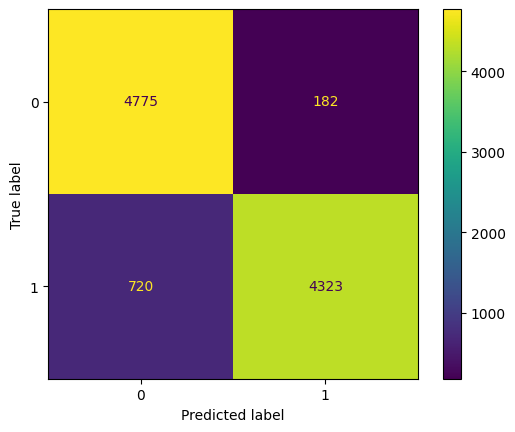

In [35]:
y_pred_ense = []
votes = {}
for i in range(len(y_test)):
  votes = y_pred_bert_filtered[i] + y_pred_movie_filtered[i] + y_pred_amazon_filtered[i]
  y_pred_ense.append(1 if votes > 2 else 0)

evaluate_model(y_test, y_pred_ense)

## Bert base

In [6]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

model = "nlptown/bert-base-multilingual-uncased-sentiment"


tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, truncation=True, max_length=512, device=0)

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [7]:
import sys

y_pred = []
for i, text in enumerate(X_test):
    sys.stdout.write('\r')
    sys.stdout.write(f"Processing {i} of {len(X_test)}")
    sys.stdout.flush()
    y_pred.append(classifier(text)[0]['label'])


Processing 19 of 5000

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Processing 4999 of 5000

['2 stars', '4 stars', '4 stars', '3 stars', '2 stars', '3 stars', '1 star', '4 stars', '1 star', '1 star', '4 stars', '2 stars', '5 stars', '4 stars', '1 star', '3 stars', '4 stars', '5 stars', '5 stars', '1 star', '2 stars', '5 stars', '5 stars', '4 stars', '1 star', '5 stars', '2 stars', '2 stars', '1 star', '2 stars', '1 star', '5 stars', '4 stars', '4 stars', '4 stars', '5 stars', '3 stars', '2 stars', '4 stars', '4 stars', '5 stars', '2 stars', '2 stars', '1 star', '5 stars', '1 star', '3 stars', '5 stars', '4 stars', '4 stars', '3 stars', '3 stars', '4 stars', '5 stars', '1 star', '1 star', '3 stars', '2 stars', '2 stars', '4 stars', '2 stars', '2 stars', '1 star', '2 stars', '2 stars', '3 stars', '1 star', '2 stars', '2 stars', '2 stars', '1 star', '2 stars', '4 stars', '5 stars', '1 star', '5 stars', '1 star', '2 stars', '3 stars', '2 stars', '5 stars', '2 stars', '4 stars', '2 stars', '4 stars', '3 stars', '4 stars', '4 stars', '1 star', '3 stars', '2 stars', '4 stars', '2 st

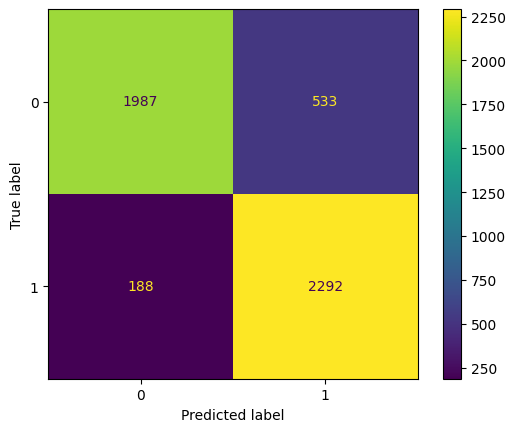

In [12]:
print(y_pred)
print(y_test)
y_pred_filtered = [0 if int(x.split(" ")[0]) < 3 else 1 for x in y_pred_]
y_pred_movie_filtered = [0 if x == "NEG" else 1 for x in y_pred]
y_pred_amazon_filtered = [0 if int(x.split(" ")[0]) <= 3 else 1 for x in y_pred]
evaluate_model(y_test, y_pred_filtered)

## Movie review

In [20]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

model = "JamesH/Movie_review_sentiment_analysis_model"

tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, truncation=True, max_length=512, device=0)

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/738M [00:00<?, ?B/s]

In [21]:
import sys

y_pred = []
for i, text in enumerate(X_test):
    sys.stdout.write('\r')
    sys.stdout.write(f"Processing {i} of {len(X_test)}")
    sys.stdout.flush()
    y_pred.append(classifier(text)[0]['label'])


Processing 16 of 5000

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Processing 4999 of 5000

['POS', 'POS', 'POS', 'POS', 'NEG', 'POS', 'NEG', 'POS', 'NEG', 'NEG', 'POS', 'NEG', 'POS', 'POS', 'NEG', 'NEG', 'POS', 'POS', 'POS', 'NEG', 'NEG', 'NEG', 'POS', 'POS', 'NEG', 'POS', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'POS', 'POS', 'POS', 'POS', 'POS', 'NEG', 'NEG', 'POS', 'POS', 'POS', 'POS', 'NEG', 'NEG', 'POS', 'NEG', 'POS', 'POS', 'POS', 'POS', 'POS', 'NEG', 'POS', 'POS', 'NEG', 'NEG', 'POS', 'NEG', 'NEG', 'POS', 'NEG', 'NEG', 'NEG', 'POS', 'NEG', 'POS', 'NEG', 'POS', 'NEG', 'NEG', 'NEG', 'NEG', 'POS', 'POS', 'NEG', 'POS', 'NEG', 'NEG', 'NEG', 'NEG', 'POS', 'NEG', 'POS', 'POS', 'POS', 'NEG', 'POS', 'POS', 'NEG', 'POS', 'NEG', 'POS', 'NEG', 'POS', 'POS', 'POS', 'POS', 'NEG', 'POS', 'NEG', 'POS', 'NEG', 'NEG', 'POS', 'POS', 'POS', 'POS', 'NEG', 'NEG', 'POS', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'POS', 'NEG', 'POS', 'NEG', 'POS', 'POS', 'POS', 'NEG', 'POS', 'NEG', 'NEG', 'POS', 'NEG', 'POS', 'NEG', 'POS', 'NEG', 'NEG', 'NEG', 'POS', 'POS', 'POS', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG'

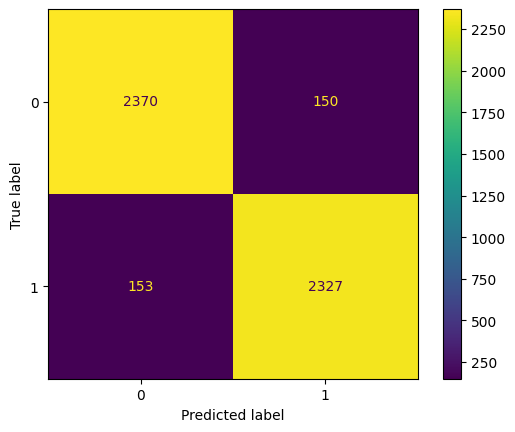

In [23]:
print(y_pred)
print(y_test)
y_pred_filtered = [0 if x == "NEG" else 1 for x in y_pred]
# # print(y_pred_filtered)
evaluate_model(y_test, y_pred_filtered)

## Amazon

In [24]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

model = "LiYuan/amazon-review-sentiment-analysis"

tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, truncation=True, max_length=512, device=0)

tokenizer_config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/670M [00:00<?, ?B/s]

In [25]:
import sys

y_pred = []
for i, text in enumerate(X_test):
    sys.stdout.write('\r')
    sys.stdout.write(f"Processing {i} of {len(X_test)}")
    sys.stdout.flush()
    y_pred.append(classifier(text)[0]['label'])


Processing 19 of 5000

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Processing 4999 of 5000

In [ ]:
print(y_pred)
print(y_test)
y_pred_filtered = [0 if int(x.split(" ")[0]) <= 3 else 1 for x in y_pred]
# print(y_pred_filtered)
evaluate_model(y_test, y_pred_filtered)